In [2]:
import pandas as pd

In [3]:
df1 = pd.read_csv("./data/OH_LD_CAI_3_avg_max_min.csv")
df1

,X,Y,AvgRate_ftPerYr_Unfiltered,AvgRate_ftPerYr,AvgRate_Implicit,MaxRate_ftPerYr,MinRate_ftPerYr,Median_ftPerYr,AvgRate_First_Last_ftPerYr,LastZ_ft,LastZ_SurvID_ft,Num_Svys,Std_ft,Max_Num_Std,X_lon,Y_lat
0,656482.42157,1.941005e+06,0.0,0.0,NaN,NaN,NaN,NaN,NaN,12.72170,OH_LD_CAI_20111026_CS_966_975,1.0,0.0,0.0,-89.12503,37.11065
1,656492.42157,1.941005e+06,0.0,0.0,NaN,NaN,NaN,NaN,NaN,12.45691,OH_LD_CAI_20111026_CS_966_975,1.0,0.0,0.0,-89.12500,37.11065
2,656472.42157,1.940995e+06,0.0,0.0,NaN,NaN,NaN,NaN,NaN,12.80437,OH_LD_CAI_20111026_CS_966_975,1.0,0.0,0.0,-89.12507,37.11062
3,656482.42157,1.940995e+06,0.0,0.0,NaN,NaN,NaN,NaN,NaN,12.49454,OH_LD_CAI_20111026_CS_966_975,1.0,0.0,0.0,-89.12503,37.11062
4,656492.42157,1.940995e+06,0.0,0.0,NaN,NaN,NaN,NaN,NaN,12.17989,OH_LD_CAI_20111026_CS_966_975,1.0,0.0,0.0,-89.12500,37.11063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011387,642372.42157,1.918475e+06,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2.90752,OH_LD_CAI_20111026_CS_966_975,1.0,0.0,0.0,-89.17059,37.04742
1011388,642382.42157,1.918475e+06,0.0,0.0,NaN,NaN,NaN,NaN,NaN,3.24739,OH_LD_CAI_20111026_CS_966_975,1.0,0.0,0.0,-89.17056,37.04742
1011389,642352.42157,1.918465e+06,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2.40350,OH_LD_CAI_20111026_CS_966_975,1.0,0.0,0.0,-89.17066,37.04739
1011390,642362.42157,1.918465e+06,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2.69444,OH_LD_CAI_20111026_CS_966_975,1.0,0.0,0.0,-89.17063,37.04739


In [5]:
df1.describe()

,X,Y,AvgRate_ftPerYr_Unfiltered,AvgRate_ftPerYr,AvgRate_Implicit,MaxRate_ftPerYr,MinRate_ftPerYr,Median_ftPerYr,AvgRate_First_Last_ftPerYr,LastZ_ft,Num_Svys,Std_ft,Max_Num_Std,X_lon,Y_lat
count,1.011392e+06,1.011392e+06,1.011392e+06,1.011392e+06,434248.000000,434248.000000,434248.000000,434248.000000,434248.000000,1.011392e+06,1.011392e+06,1.011392e+06,1.011392e+06,1.011392e+06,1.011392e+06
mean,6.482765e+05,1.930249e+06,6.052301e-01,5.897716e-01,1.837691,11.677421,-7.816613,1.451559,1.837691,-6.478639e+00,1.712446e+01,6.696171e-03,1.008658e+00,-8.915183e+01,3.708032e+01
std,4.999156e+03,5.745048e+03,2.498668e+00,2.276719e+00,5.899313,11.551791,13.544943,5.513327,5.899313,6.511500e+00,1.802697e+01,1.228423e-02,1.336294e+00,1.645800e-02,1.623692e-02
min,6.395424e+05,1.918465e+06,-1.500000e+01,-1.500000e+01,-67.491790,-67.491790,-157.516960,-67.491790,-67.491790,-3.157414e+01,1.000000e+00,0.000000e+00,0.000000e+00,-8.918036e+01,3.704739e+01
25%,6.438124e+05,1.925645e+06,0.000000e+00,0.000000e+00,0.374647,5.659388,-10.717925,0.465650,0.374647,-1.128989e+01,1.000000e+00,0.000000e+00,0.000000e+00,-8.916652e+01,3.706725e+01
50%,6.479024e+05,1.930755e+06,0.000000e+00,0.000000e+00,1.739740,9.672195,-3.713515,1.094735,1.739740,-6.350885e+00,6.000000e+00,0.000000e+00,0.000000e+00,-8.915318e+01,3.708168e+01
75%,6.525224e+05,1.935065e+06,1.041640e+00,1.048418e+00,2.957043,15.009965,-0.600665,1.820360,2.957043,-1.768638e+00,4.100000e+01,1.043000e-02,2.000000e+00,-8.913788e+01,3.709392e+01
max,6.586324e+05,1.941005e+06,3.000000e+01,3.000000e+01,224.307220,266.617050,224.307220,224.307220,224.307220,1.850648e+01,4.500000e+01,5.538400e-01,4.000000e+00,-8.911727e+01,3.711065e+01


In [6]:
df1[df1['AvgRate_ftPerYr_Unfiltered'] > 0].describe()

,X,Y,AvgRate_ftPerYr_Unfiltered,AvgRate_ftPerYr,AvgRate_Implicit,MaxRate_ftPerYr,MinRate_ftPerYr,Median_ftPerYr,AvgRate_First_Last_ftPerYr,LastZ_ft,Num_Svys,Std_ft,Max_Num_Std,X_lon,Y_lat
count,385652.000000,3.856520e+05,385652.000000,385652.000000,385652.000000,385652.000000,385652.000000,385652.000000,385652.000000,385652.000000,385652.000000,385652.000000,385652.000000,385652.000000,385652.000000
mean,648369.197679,1.931796e+06,1.923919,1.815176,2.536092,12.883059,-7.236359,2.017817,2.536092,-10.519516,37.278194,0.015883,2.450266,-89.151700,37.084575
std,5016.425301,5.336879e+03,3.237300,2.938946,5.369504,11.050690,13.339514,5.053568,5.369504,4.797277,10.208607,0.014303,0.920102,0.016541,0.015135
min,640182.421570,1.921075e+06,0.000040,-15.000000,-25.937320,0.000120,-148.481530,-25.937320,-25.937320,-27.014200,2.000000,0.000000,0.000000,-89.178470,37.054450
25%,643642.421570,1.927135e+06,0.870590,0.885707,0.826887,6.565843,-9.904978,0.673970,0.826887,-13.681573,34.000000,0.007910,2.000000,-89.167290,37.071300
50%,648082.421570,1.932605e+06,1.297170,1.276600,1.968435,10.308775,-3.340055,1.222190,1.968435,-11.223850,43.000000,0.012320,3.000000,-89.152800,37.086760
75%,653042.421570,1.936495e+06,1.878840,1.818973,3.130447,15.771242,-0.427083,1.930800,3.130447,-7.890100,44.000000,0.020750,3.000000,-89.136280,37.097930
max,657672.421570,1.940815e+06,30.000000,30.000000,224.307220,266.617050,224.307220,224.307220,224.307220,9.297240,45.000000,0.553840,4.000000,-89.120740,37.110140


<AxesSubplot:>

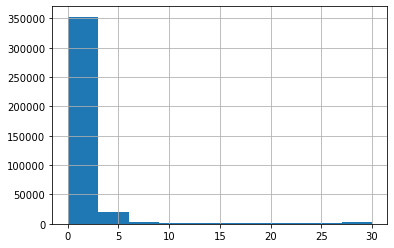

In [7]:
df1[df1['AvgRate_ftPerYr_Unfiltered'] > 0]['AvgRate_ftPerYr_Unfiltered'].hist()